
# **Data Science Project**
------
# **SpaceX Falcon 9 First Stage Landing Prediction**

### Zak Mohamed
- July 2024

In this Project, we will predict if the Falcon 9 first stage will land successfully.

# Table of Contents
1. [Introduction and Business Understanding](#introduction-and-business-understanding)
2. [Data Collection and Preprocessing](#data-collection-and-preprocessing)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [EDA Using SQL](#eda-using-sql)
5. [EDA Using Visualizations](#eda-using-visualizations)
6. [Machine Learning Prediction](#machine-learning-prediction)
7. [Conclusion](#conclusion)






##1. Introduction and Business Understanding
----

SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage.

Therefore if we can determine if the first stage will land, we can determine the cost of a launch.

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

 In this Project, I  collect and make sure the data is in the correct format from an API. The following is an example of a successful and launch.

Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.
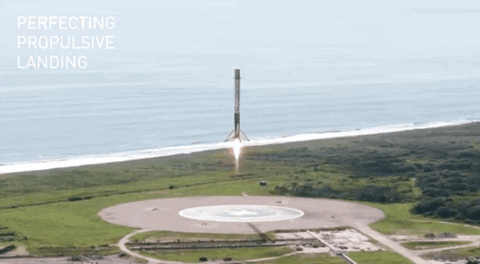

## **2. Data Collection and Preprocessing**

##Objectives
In this part, we make a get request to the SpaceX API. We also do some basic data wrangling and formating.

- Request to the SpaceX API
- Clean the requested data

In [16]:
# Importing Necessary Libraries
import requests
import pandas as pd
import numpy as np
import datetime

In [2]:
# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

Below we define a series of helper functions that will help us use the API to extract information using identification numbers in the launch data.

- From the rocket column we would like to learn the booster name.
- From the launchpad we would like to know the name of the launch site being used, the longitude, and the latitude.
- From the payload we would like to learn the mass of the payload and the orbit that it is going to.
- From cores we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, wheter the core is reused, wheter legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

In [3]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

Now we request rocket launch data from spaceX API using the following URL

In [4]:
spacex_url="https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)
# Check the content of the response

print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

### Now we request and parse SpaceX launch data using the GET request
*To make the requested JSON results more consistent, we will use the following static response object for this project: (provided by IBM Skills)*

In [5]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response = requests.get(static_json_url)

In [6]:
response.status_code # if its 200 it means the request was successful

200

Now we decode the response content as a Json using .json() and turn it into a Pandas dataframe using .json_normalize()

In [7]:
# Use json_normalize method to convert the json result into a dataframe
data_json = response.json()
data = pd.json_normalize(data_json)
data.head()

static_fire_date_utc  static_fire_date_unix    tbd    net  window  \
0  2006-03-17T00:00:00.000Z           1.142554e+09  False  False     0.0   
1                      None                    NaN  False  False     0.0   
2                      None                    NaN  False  False     0.0   
3  2008-09-20T00:00:00.000Z           1.221869e+09  False  False     0.0   
4                      None                    NaN  False  False     0.0   

                     rocket  success  \
0  5e9d0d95eda69955f709d1eb    False   
1  5e9d0d95eda69955f709d1eb    False   
2  5e9d0d95eda69955f709d1eb    False   
3  5e9d0d95eda69955f709d1eb     True   
4  5e9d0d95eda69955f709d1eb     True   

                                                                                                                                                                                details  \
0                                                                                                                                      Engine failure at 33 seconds and loss of vehicle   
1  Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage   
2                                                                                                                  Residual stage 1 thrust led to collision between stage 1 and stage 2   
3                        Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1   
4                                                                                                                                                                                  None   

  crew ships capsules                                              payloads  \
0   []    []       []                            [5eb0e4b5b6c3bb0006eeb1e1]   
1   []    []       []                            [5eb0e4b6b6c3bb0006eeb1e2]   
2   []    []       []  [5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]   
3   []    []       []                            [5eb0e4b7b6c3bb0006eeb1e5]   
4   []    []       []                            [5eb0e4b7b6c3bb0006eeb1e6]   

                  launchpad  auto_update  \
0  5e9e4502f5090995de566f86         True   
1  5e9e4502f5090995de566f86         True   
2  5e9e4502f5090995de566f86         True   
3  5e9e4502f5090995de566f86         True   
4  5e9e4502f5090995de566f86         True   

                                                                                                            failures  \
0                                                [{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]   
1            [{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]   
2  [{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]   
3                                                                                                                 []   
4                                                                                                                 []   

   flight_number         name                  date_utc   date_unix  \
0              1    FalconSat  2006-03-24T22:30:00.000Z  1143239400   
1              2      DemoSat  2007-03-21T01:10:00.000Z  1174439400   
2              3  Trailblazer  2008-08-03T03:34:00.000Z  1217734440   
3              4       RatSat  2008-09-28T23:15:00.000Z  1222643700   
4              5     RazakSat  2009-07-13T03:35:00.000Z  1247456100   

                  date_local date_precision  upcoming  \
0  2006-03-25T10:30:00+12:00           hour     False   
1  2007-03-21T13:10:00+12:00           hour     False   
2  2008-08-03T15:34:00+12:00           hour     False   
3  2008-09-28T11:15:00+12:00           hour     False   
4  2009-07-13

That is a lot of information. We notice it is mostly info about ID numbers. for example  the rocket column has no information about the rocket just an identification number.

We will now use the API again to get information about the launches using the IDs given for each launch. Specifically we will be using columns rocket, payloads, launchpad, and cores.

In [8]:
# Take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# Remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

- From the rocket we would like to learn the booster name

- From the payload we would like to learn the mass of the payload and the orbit that it is going to

- From the launchpad we would like to know the name of the launch site being used, the longitude, and the latitude.

- From cores we would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, whether the core is reused, whether legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.

The data from these requests will be stored in lists and will be used to create a new dataframe.

In [9]:
#Global variables
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

Now we call the functions we declared earlier

In [10]:
getBoosterVersion(data)
BoosterVersion[0:5] # This is an example to see if it worked

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [11]:
# Call getLaunchSite
getLaunchSite(data)
# Call getPayloadData
getPayloadData(data)
# Call getCoreData
getCoreData(data)

Finally We construct the dataset using the data we have obtained. We combine the columns into a dictionary.

In [12]:

launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

We now create a Pandas dataframe from the dictionary

In [13]:
data = pd.DataFrame(launch_dict)
data.head()

FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0             1  2006-03-24       Falcon 1         20.0   LEO   
1             2  2007-03-21       Falcon 1          NaN   LEO   
2             4  2008-09-28       Falcon 1        165.0   LEO   
3             5  2009-07-13       Falcon 1        200.0   LEO   
4             6  2010-06-04       Falcon 9          NaN   LEO   

        LaunchSite    Outcome  Flights  GridFins  Reused   Legs LandingPad  \
0  Kwajalein Atoll  None None        1     False   False  False       None   
1  Kwajalein Atoll  None None        1     False   False  False       None   
2  Kwajalein Atoll  None None        1     False   False  False       None   
3  Kwajalein Atoll  None None        1     False   False  False       None   
4     CCSFS SLC 40  None None        1     False   False  False       None   

   Block  ReusedCount    Serial   Longitude   Latitude  
0    NaN            0  Merlin1A  167.743129   9.047721  
1    NaN            0  Merlin2A  167.743129   9.047721  
2    NaN            0  Merlin2C  167.743129   9.047721  
3    NaN            0  Merlin3C  167.743129   9.047721  
4    1.0            0     B0003  -80.577366  28.561857

The BoosterVersion column has info about falcon 1 and falcon 9. All we need are information about falcon 9. We therefore need to remove all flcon 1 entries.

In [14]:
data_falcon9 = data[data['BoosterVersion'] != 'Falcon 1'].copy()
# the following code now resets the flight numbers in the table because we took out falcon 1 rows.
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4              1  2010-06-04       Falcon 9          NaN   LEO  CCSFS SLC 40   
5              2  2012-05-22       Falcon 9        525.0   LEO  CCSFS SLC 40   
6              3  2013-03-01       Falcon 9        677.0   ISS  CCSFS SLC 40   
7              4  2013-09-29       Falcon 9        500.0    PO   VAFB SLC 4E   
8              5  2013-12-03       Falcon 9       3170.0   GTO  CCSFS SLC 40   
..           ...         ...            ...          ...   ...           ...   
89            86  2020-09-03       Falcon 9      15600.0  VLEO    KSC LC 39A   
90            87  2020-10-06       Falcon 9      15600.0  VLEO    KSC LC 39A   
91            88  2020-10-18       Falcon 9      15600.0  VLEO    KSC LC 39A   
92            89  2020-10-24       Falcon 9      15600.0  VLEO  CCSFS SLC 40   
93            90  2020-11-05       Falcon 9       3681.0   MEO  CCSFS SLC 40   

        Outcome  Flights  GridFins  Reused   Legs                LandingPad  \
4     None None        1     False   False  False                      None   
5     None None        1     False   False  False                      None   
6     None None        1     False   False  False                      None   
7   False Ocean        1     False   False  False                      None   
8     None None        1     False   False  False                      None   
..          ...      ...       ...     ...    ...                       ...   
89    True ASDS        2      True    True   True  5e9e3032383ecb6bb234e7ca   
90    True ASDS        3      True    True   True  5e9e3032383ecb6bb234e7ca   
91    True ASDS        6      True    True   True  5e9e3032383ecb6bb234e7ca   
92    True ASDS        3      True    True   True  5e9e3033383ecbb9e534e7cc   
93    True ASDS        1      True   False   True  5e9e3032383ecb6bb234e7ca   

    Block  ReusedCount Serial   Longitude   Latitude  
4     1.0            0  B0003  -80.577366  28.561857  
5     1.0            0  B0005  -80.577366  28.561857  
6     1.0            0  B0007  -80.577366  28.561857  
7     1.0            0  B1003 -120.610829  34.632093  
8     1.0            0  B1004  -80.577366  28.561857  
..    ...          ...    ...         ...        ...  
89    5.0           12  B1060  -80.603956  28.608058  
90    5.0           13  B1058  -80.603956  28.608058  
91    5.0           12  B1051  -80.603956  28.608058  
92    5.0           12  B1060  -80.577366  28.561857  
93    5.0            8  B1062  -80.577366  28.561857  

[90 rows x 17 columns]

## **3. Exploratory Data Analysis**
We can see that some of the columns are missing values/entries in the data. We therefore need to clean that up.





In [15]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

now we deal with the missing values. Landing pad is missing 26 entries. If landing pad wasn't used, it will have none values as the entry.

For the payloadMass, a way to deal with numerical missing values is by taking the mean of the entire column and replacing the missing entries with that value.

In [16]:
# Calculate the mean value of PayloadMass column
payload_mean = data_falcon9['PayloadMass'].mean()
# Replace the np.nan values with its mean value
data_falcon9['PayloadMass'].replace(np.nan, payload_mean, inplace=True)
data_falcon9.head()
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

Lets calculate the percentage of missing values in each attribute

In [17]:
df = data_falcon9
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

Identify which columns(attributes) are numerical and which are categorical

In [18]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

The data contains several Space X launch facilities: Cape Canaveral Space Launch Complex 40 VAFB SLC 4E , Vandenberg Air Force Base Space Launch Complex 4E (SLC-4E), Kennedy Space Center Launch Complex 39A KSC LC 39A .

The location of each Launch Is placed in the column LaunchSite

Next, let's see the number of launches for each site.

In [19]:
df['LaunchSite'].value_counts()

LaunchSite
CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

Each launch aims to an dedicated orbit, and here are some common orbit types: 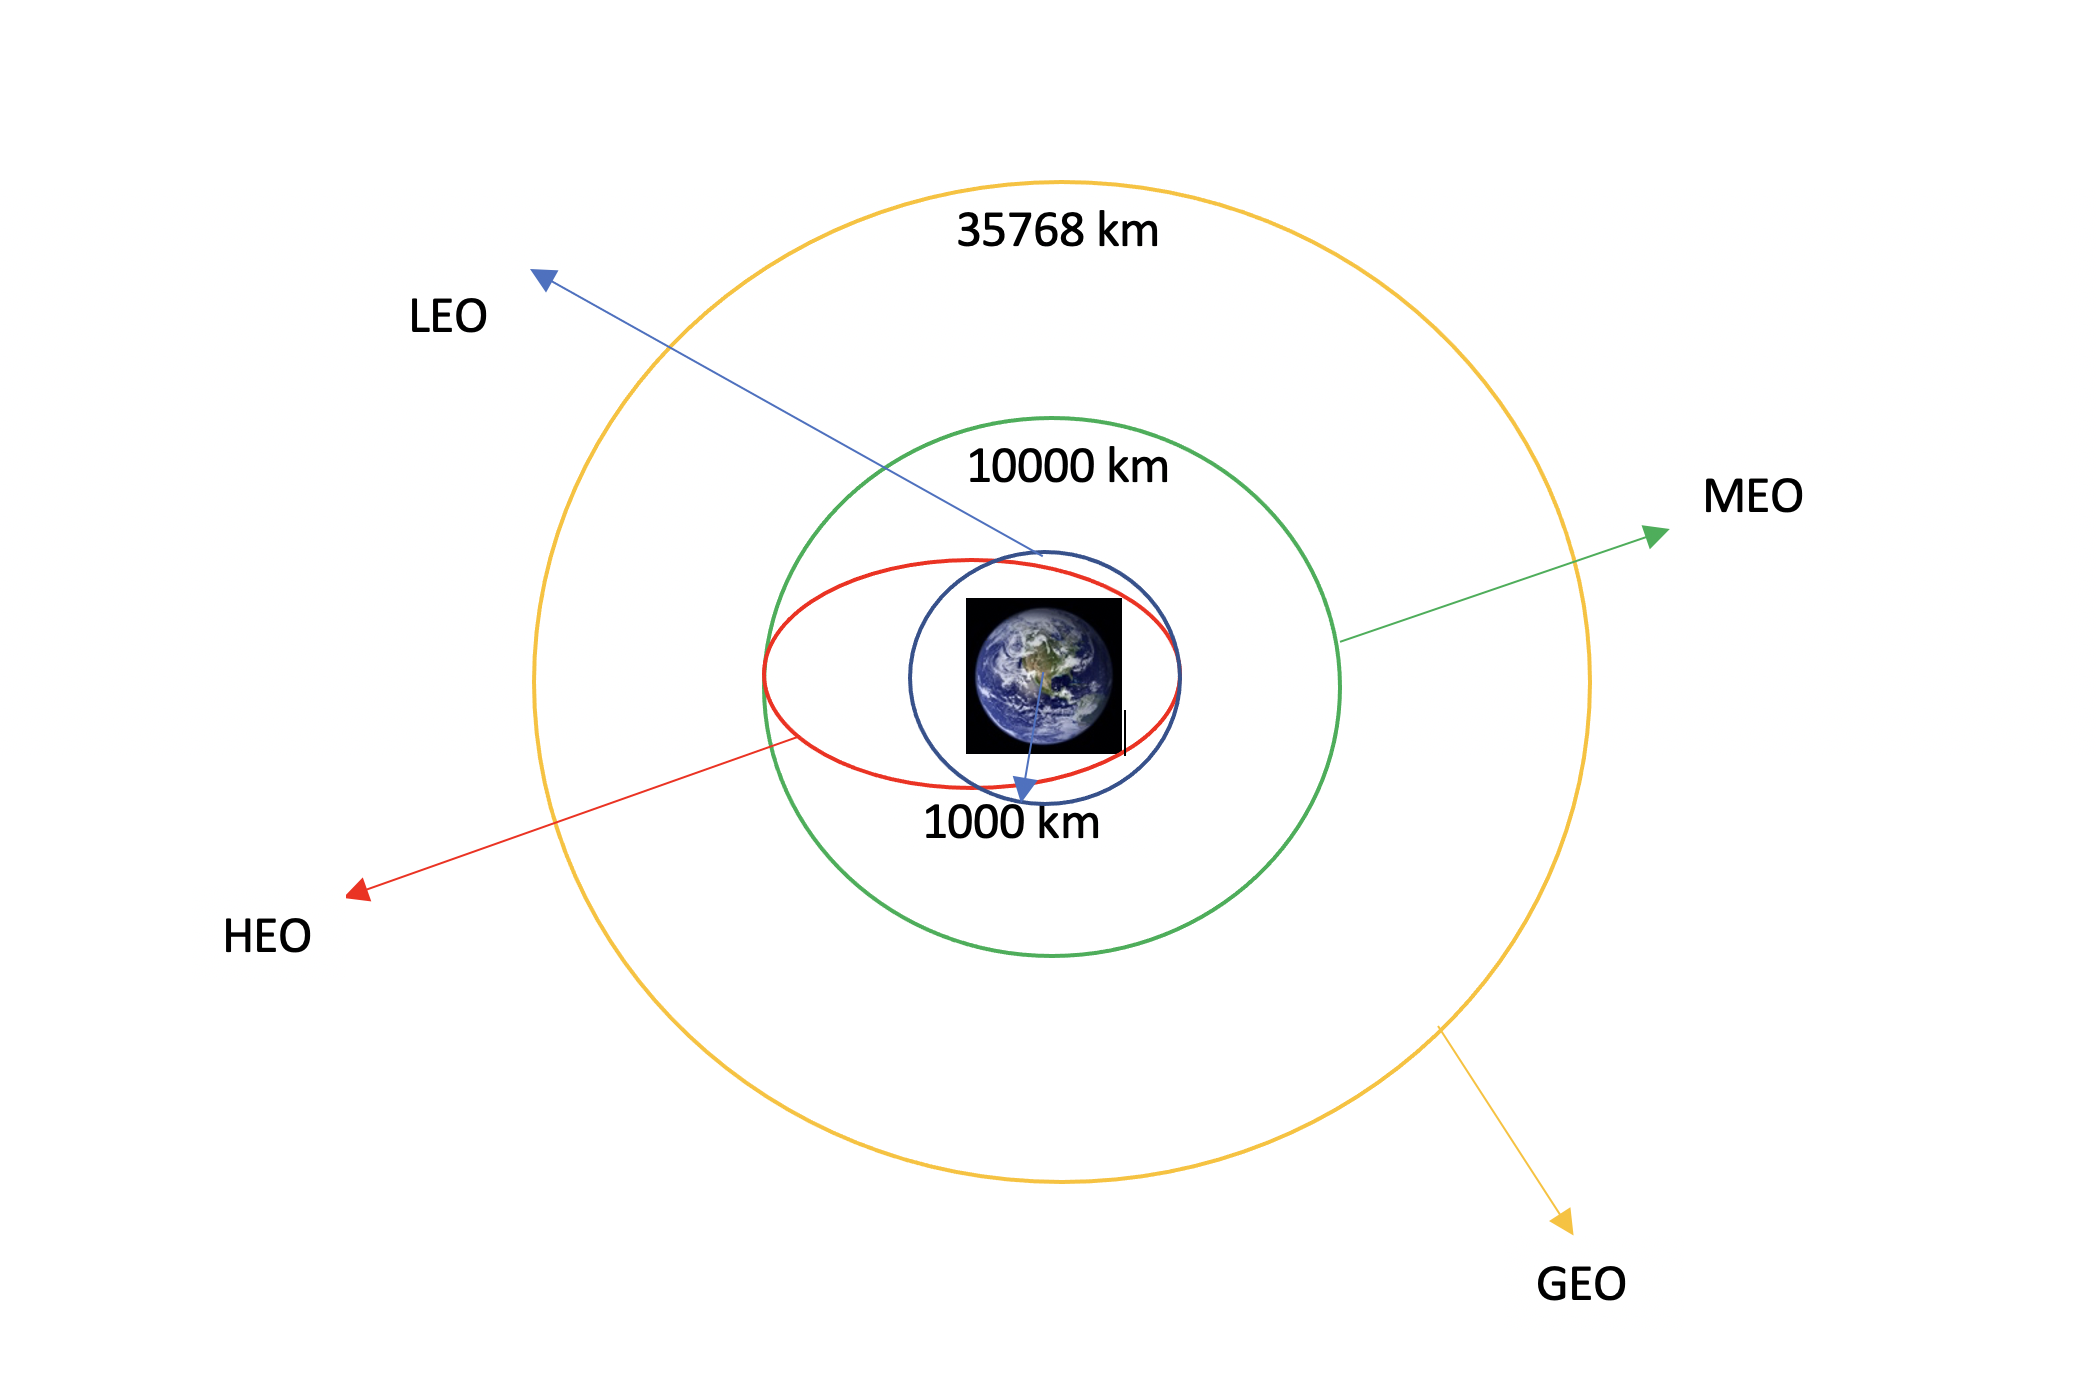

Lets count the number and occurence of each orbit.

Then calculate the number and occurence of mission outcome of the orbits

In [20]:
df['Orbit'].value_counts()


Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

In [21]:
# landing_outcomes = values on Outcome column
landing_outcomes = df['Outcome'].value_counts()
landing_outcomes

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

True Ocean means the mission outcome was successfully landed to a specific region of the ocean while False Ocean means the mission outcome was unsuccessfully landed to a specific region of the ocean. True RTLS means the mission outcome was successfully landed to a ground pad False RTLS means the mission outcome was unsuccessfully landed to a ground pad.True ASDS means the mission outcome was successfully landed to a drone ship False ASDS means the mission outcome was unsuccessfully landed to a drone ship. None ASDS and None None these represent a failure to land.

We now create an outcome landing label from the outcome column.

But first we create a set of outcomes where the second stage did not land successfully:

SO let's first see where the outcomes are in terms of the outcome column

In [22]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [23]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

Using the Outcome, create a list where the element is zero if the corresponding row in Outcome is in the set bad_outcome; otherwise, it's one. Then assign it to the variable landing_class:

In [24]:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise
# Define the set of bad outcomes
bad_outcomes = {'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

# Create landing_class list
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in df['Outcome']]

This variable will represent the classification variable that represents the outcome of each launch.

If the value is zero, the first stage did not land successfully; one means the first stage landed Successfully

In [25]:
df['Class']=landing_class
df[['Class']].head(8)
df.head(10)

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4              1  2010-06-04       Falcon 9  6123.547647   LEO  CCSFS SLC 40   
5              2  2012-05-22       Falcon 9   525.000000   LEO  CCSFS SLC 40   
6              3  2013-03-01       Falcon 9   677.000000   ISS  CCSFS SLC 40   
7              4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
8              5  2013-12-03       Falcon 9  3170.000000   GTO  CCSFS SLC 40   
9              6  2014-01-06       Falcon 9  3325.000000   GTO  CCSFS SLC 40   
10             7  2014-04-18       Falcon 9  2296.000000   ISS  CCSFS SLC 40   
11             8  2014-07-14       Falcon 9  1316.000000   LEO  CCSFS SLC 40   
12             9  2014-08-05       Falcon 9  4535.000000   GTO  CCSFS SLC 40   
13            10  2014-09-07       Falcon 9  4428.000000   GTO  CCSFS SLC 40   

        Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
4     None None        1     False   False  False       None    1.0   
5     None None        1     False   False  False       None    1.0   
6     None None        1     False   False  False       None    1.0   
7   False Ocean        1     False   False  False       None    1.0   
8     None None        1     False   False  False       None    1.0   
9     None None        1     False   False  False       None    1.0   
10   True Ocean        1     False   False   True       None    1.0   
11   True Ocean        1     False   False   True       None    1.0   
12    None None        1     False   False  False       None    1.0   
13    None None        1     False   False  False       None    1.0   

    ReusedCount Serial   Longitude   Latitude  Class  
4             0  B0003  -80.577366  28.561857      0  
5             0  B0005  -80.577366  28.561857      0  
6             0  B0007  -80.577366  28.561857      0  
7             0  B1003 -120.610829  34.632093      0  
8             0  B1004  -80.577366  28.561857      0  
9             0  B1005  -80.577366  28.561857      0  
10            0  B1006  -80.577366  28.561857      1  
11            0  B1007  -80.577366  28.561857      1  
12            0  B1008  -80.577366  28.561857      0  
13            0  B1011  -80.577366  28.561857      0

We can then find the success rate of the falcon 9 landings.

We also save the dataFrame at this stage to a csv format because we are done collecting and cleaning it

In [26]:
# Calculate the success rate
success_rate = df['Class'].mean()
print(f"Success rate: {success_rate * 100:.2f}%")

#Export updated DataFrame to a CSV file
df.to_csv('dataset_part_2.csv', index=False)

Success rate: 66.67%


## **4. EDA Using SQL**

*The following portion isn't necessary for the Project but I do it for experience with SQL as it is a necessary tool for Data Scientists and ML Engineers.*

### Objectives
- Load the dataset into the corresponding table in a Db2 database
- Execute SQL queries to answer some questions from the SpaceX dataset.

This portion however, requires to load the spaceX dataset.


https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!pip install sqlalchemy==1.3.9

#### **Connect to the Database**

Let us first load the SQL extension and establish a connection with the database


In [ ]:
!pip install ipython-sql
%load_ext sql
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()
!pip install -q pandas
# Establishing a connection with the SQLite database 'my_data1.db'
%sql sqlite:///my_data1.db
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

In [40]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [41]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null
df.head(3)

 * sqlite:///my_data1.db
Done.


Date Time (UTC) Booster_Version  Launch_Site  \
0  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   

                                                         Payload  \
0                           Dragon Spacecraft Qualification Unit   
1  Dragon demo flight C1, two CubeSats, barrel of Brouere cheese   
2                                          Dragon demo flight C2   

   PAYLOAD_MASS__KG_      Orbit         Customer Mission_Outcome  \
0                  0        LEO           SpaceX         Success   
1                  0  LEO (ISS)  NASA (COTS) NRO         Success   
2                525  LEO (ISS)      NASA (COTS)         Success   

       Landing_Outcome  
0  Failure (parachute)  
1  Failure (parachute)  
2           No attempt

**Now we answer some questions regarding the dataset**
1. Display the names of the unique launch sites in the space mission
2. Display 5 records where launch sites begin with the string 'CCA'
3. Display the total payload mass carried by boosters launched by NASA (CRS)
4. Display average payload mass carried by booster version F9 v1.1
5. List the date when the first succesful landing outcome in ground pad was acheived.
6. List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000
7. List the total number of successful and failure mission outcomes
8. List the names of the booster_versions which have carried the maximum payload mass. Use a subquery.
9. List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.
10. Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.

In [42]:
#question 2: Display 5 records where launch sites begin with the string 'CCA'
%sql SELECT * FROM SPACEXTBL WHERE "Launch_Site" like "CCA%" LIMIT 5


 * sqlite:///my_data1.db
Done.


[('2010-06-04', '18:45:00', 'F9 v1.0  B0003', 'CCAFS LC-40', 'Dragon Spacecraft Qualification Unit', 0, 'LEO', 'SpaceX', 'Success', 'Failure (parachute)'),
 ('2010-12-08', '15:43:00', 'F9 v1.0  B0004', 'CCAFS LC-40', 'Dragon demo flight C1, two CubeSats, barrel of Brouere cheese', 0, 'LEO (ISS)', 'NASA (COTS) NRO', 'Success', 'Failure (parachute)'),
 ('2012-05-22', '7:44:00', 'F9 v1.0  B0005', 'CCAFS LC-40', 'Dragon demo flight C2', 525, 'LEO (ISS)', 'NASA (COTS)', 'Success', 'No attempt'),
 ('2012-10-08', '0:35:00', 'F9 v1.0  B0006', 'CCAFS LC-40', 'SpaceX CRS-1', 500, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt'),
 ('2013-03-01', '15:10:00', 'F9 v1.0  B0007', 'CCAFS LC-40', 'SpaceX CRS-2', 677, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt')]

In [43]:
# question 3: Display the total payload mass carried by boosters launched by NASA (CRS)
%%sql
SELECT SUM("PAYLOAD_MASS__KG_") AS total_payload_mass
FROM SPACEXTABLE WHERE Customer = 'NASA (CRS)';

 * sqlite:///my_data1.db
Done.


[(45596,)]

In [44]:
# question 4: Display average payload mass carried by booster version F9 v1.1
%%sql
SELECT AVG("PAYLOAD_MASS__KG_") AS average_payload_mass
FROM SPACEXTABLE WHERE "Booster_Version" = 'F9 v1.1';

 * sqlite:///my_data1.db
Done.


[(2928.4,)]

In [45]:
# question 5: List the date when the first succesful landing outcome in ground pad was acheived
%%sql
SELECT MIN(Date) AS first_success_ground_pad FROM SPACEXTABLE
WHERE "Landing_Outcome" = 'Success (ground pad)';

 * sqlite:///my_data1.db
Done.


[('2015-12-22',)]

In [46]:
# question 6: List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000
%%sql
SELECT "Booster_Version" FROM SPACEXTABLE
WHERE "Landing_Outcome" = 'Success (drone ship)'
AND "PAYLOAD_MASS__KG_" > 4000 AND "PAYLOAD_MASS__KG_" < 6000;

 * sqlite:///my_data1.db
Done.


[('F9 FT B1022',), ('F9 FT B1026',), ('F9 FT  B1021.2',), ('F9 FT  B1031.2',)]

In [47]:
# question 7: List the total number of successful and failure mission outcomes
%%sql
SELECT "Mission_Outcome", COUNT(*) AS count FROM SPACEXTABLE
GROUP BY "Mission_Outcome";


 * sqlite:///my_data1.db
Done.


[('Failure (in flight)', 1),
 ('Success', 98),
 ('Success ', 1),
 ('Success (payload status unclear)', 1)]

In [48]:
# question 8: List the names of the booster_versions which have carried the maximum payload mass. Use a subquery.

%%sql
WITH MaxPayload AS (
    SELECT MAX("PAYLOAD_MASS__KG_") AS max_payload FROM SPACEXTABLE)

SELECT "Booster_Version" FROM SPACEXTABLE WHERE "PAYLOAD_MASS__KG_" =
    (SELECT max_payload FROM MaxPayload);

 * sqlite:///my_data1.db
Done.


[('F9 B5 B1048.4',),
 ('F9 B5 B1049.4',),
 ('F9 B5 B1051.3',),
 ('F9 B5 B1056.4',),
 ('F9 B5 B1048.5',),
 ('F9 B5 B1051.4',),
 ('F9 B5 B1049.5',),
 ('F9 B5 B1060.2 ',),
 ('F9 B5 B1058.3 ',),
 ('F9 B5 B1051.6',),
 ('F9 B5 B1060.3',),
 ('F9 B5 B1049.7 ',)]

In [49]:
#question 9: List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.
# Note: SQLLite does not support monthnames. So you need to use substr(Date, 6,2) as month to get the months and substr(Date,0,5)='2015' for year.
%%sql
SELECT strftime('%m', Date) AS month, "Landing_Outcome", "Booster_Version", "Launch_Site"
FROM SPACEXTABLE
WHERE "Landing_Outcome" = 'Failure (drone ship)' AND strftime('%Y', Date) = '2015';

 * sqlite:///my_data1.db
Done.


[('01', 'Failure (drone ship)', 'F9 v1.1 B1012', 'CCAFS LC-40'),
 ('04', 'Failure (drone ship)', 'F9 v1.1 B1015', 'CCAFS LC-40')]

In [50]:
#question 10: Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.

%%sql
SELECT "Landing_Outcome", COUNT(*) AS count
FROM SPACEXTABLE
WHERE Date BETWEEN '2010-06-04' AND '2017-03-20'
GROUP BY "Landing_Outcome"
ORDER BY count DESC;

 * sqlite:///my_data1.db
Done.


[('No attempt', 10),
 ('Success (drone ship)', 5),
 ('Failure (drone ship)', 5),
 ('Success (ground pad)', 3),
 ('Controlled (ocean)', 3),
 ('Uncontrolled (ocean)', 2),
 ('Failure (parachute)', 2),
 ('Precluded (drone ship)', 1)]

## **5. EDA using Visualizations**

### Objectives
- Feature Engineering using Pandas and Matplotlib
- Exploratory Data Analysis(EDA)
- Preparing Data Feature Engineering

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


In [52]:
# Below code is to redownload the dataset again because there was a disconnect from when I uploaded another dataset for sql
file_path = '/content/dataset_part_2.csv'
df = pd.read_csv(file_path)
df.head()

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6123.547647   LEO  CCSFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCSFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCSFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      0  
1            0  B0005  -80.577366  28.561857      0  
2            0  B0007  -80.577366  28.561857      0  
3            0  B1003 -120.610829  34.632093      0  
4            0  B1004  -80.577366  28.561857      0

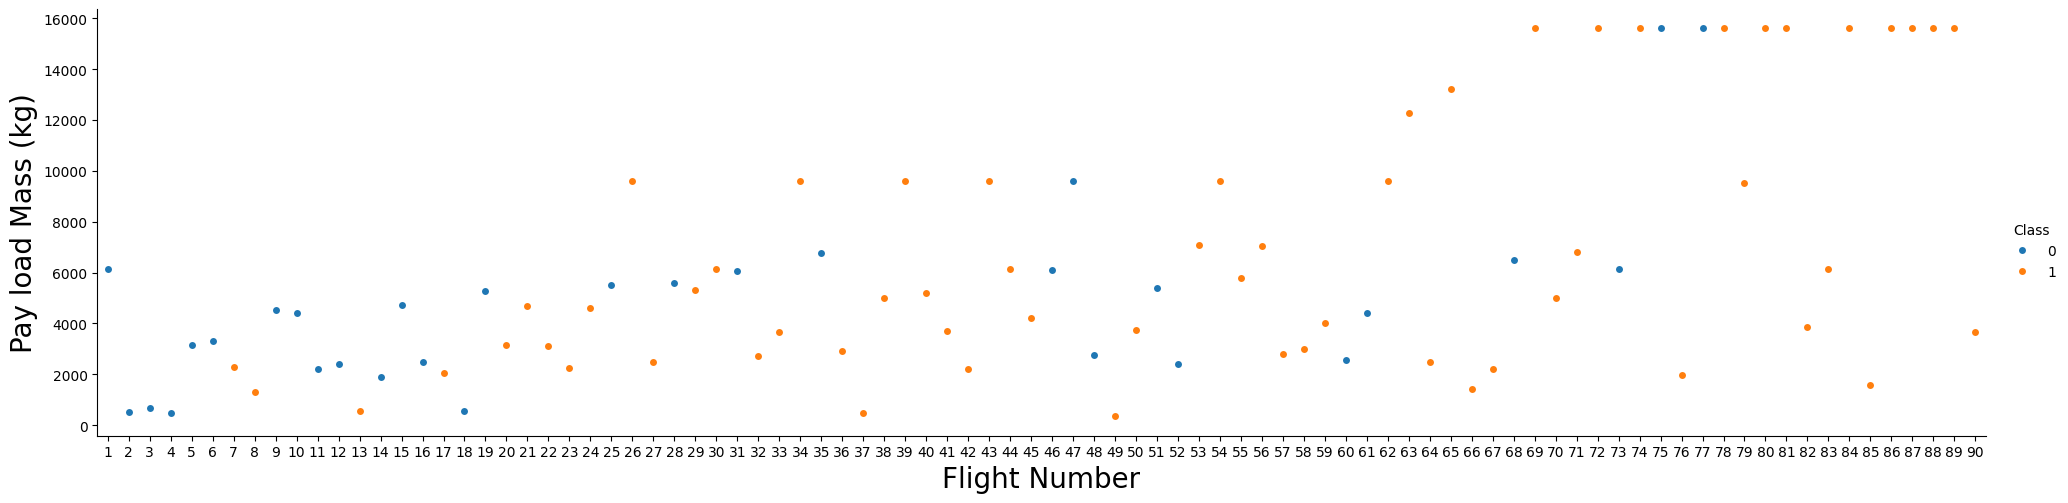

In [53]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates. CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%.

Next, let's drill down to each site visualize its detailed launch records.

#### **Relationship between Flight Number and Launch Site**

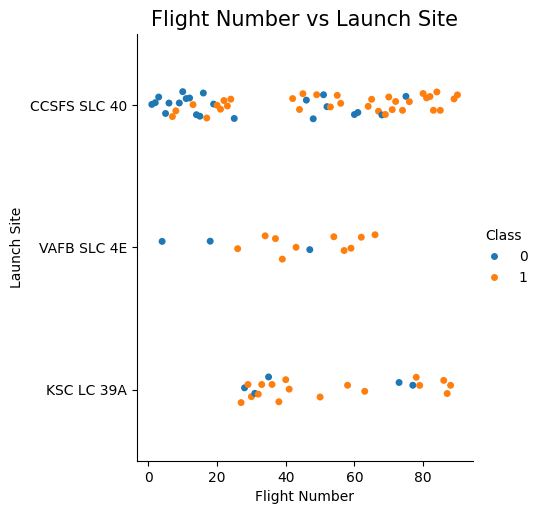

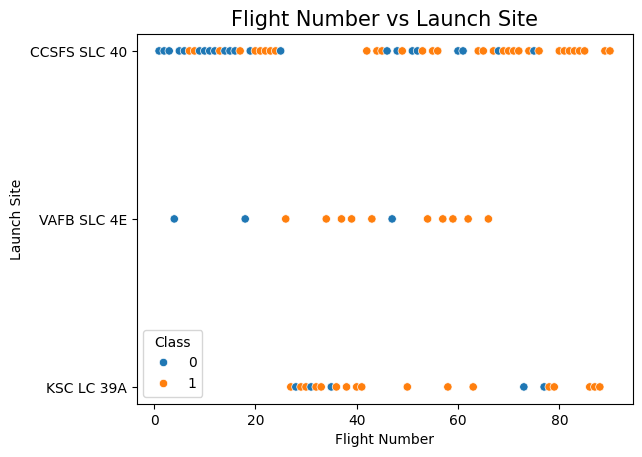

In [54]:
# Plot of a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

sns.catplot(x = 'FlightNumber', y = 'LaunchSite', hue = 'Class', data = df)
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.title("Flight Number vs Launch Site", fontsize = 15)
plt.show()

sns.scatterplot(x = 'FlightNumber', y = 'LaunchSite', hue = 'Class', data = df)
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.title("Flight Number vs Launch Site", fontsize = 15)
plt.show()

We can see in both the scatter plots and the cat plots, the landing outcomes are better as the flight numbers go up. This is true for every launch site case.

At the same time we can see in both the plots that CCSFS SLC 40 launch site has many more successful landings as compared to the other two launch sites. THis is because it has more success with less flight numbers

#### **Relationship between Payload and Launch Site**
We also want to observe if there is any relationship between launch sites and their payload mass.

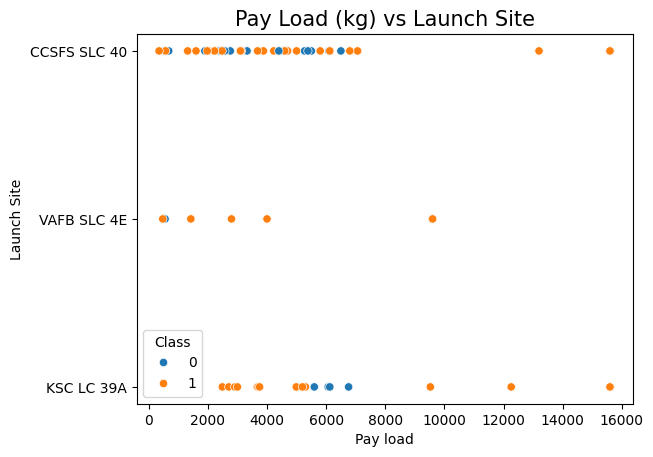

In [55]:
# Plot of a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.scatterplot(x = 'PayloadMass', y = 'LaunchSite', hue = "Class", data = df)
plt.xlabel("Pay load")
plt.ylabel("Launch Site")
plt.title("Pay Load (kg) vs Launch Site", fontsize = 15)
plt.show()

Now it makes sense why the Payload Vs. Launch Site scatter point chart had no rockets launched for the VAFB-SLC launchsite for heavypayload mass(greater than 10000)

#### **Relationship between success rate of each orbit type**
Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a bar chart for the sucess rate of each orbit

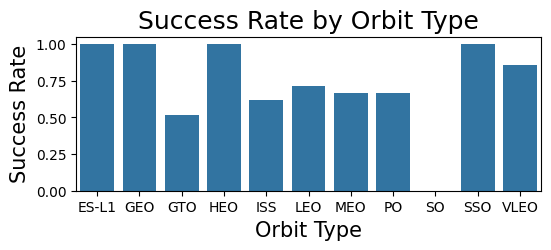

In [56]:
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
plt.figure(figsize=(6, 2))
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate)
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate by Orbit Type", fontsize=18)
plt.show()

As seen with the bar plot, ES-L1, GEO, HEO and SSO are the orbit types with the best success rate while GTO and SO are the orbit types with the worst success rate.

*To see the difference between the different orbit types, browse to section 3: Exploratory Data Analysis*

#### **Relationship between FlightNumber and Orbit type**

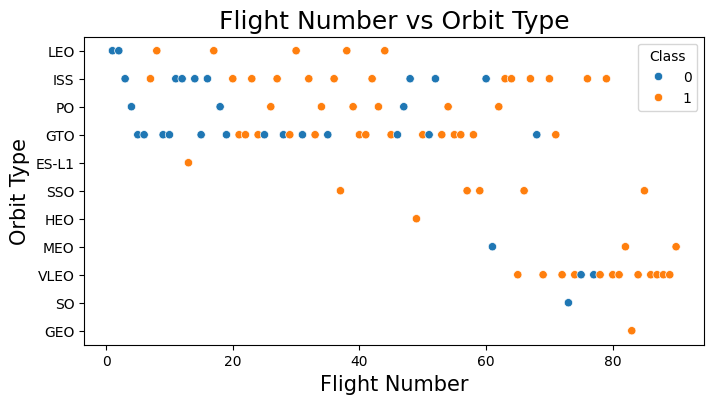

In [57]:
# Plot of a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

plt.figure(figsize=(8, 4))
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Flight Number vs Orbit Type", fontsize=18)
plt.show()

We see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

#### **Relationship between Payload and Orbit type**
Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type



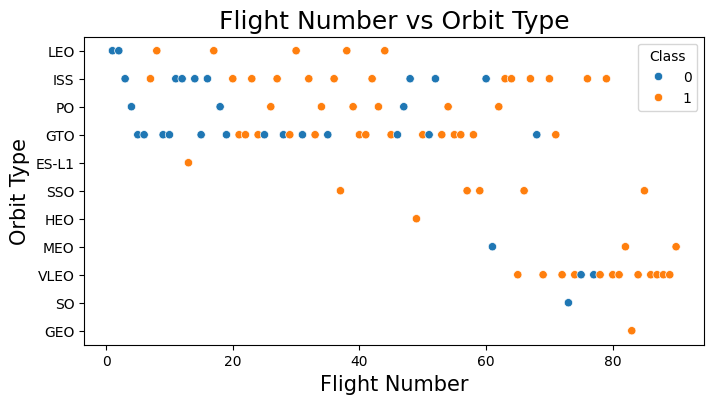

In [58]:
# Plot of a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

plt.figure(figsize=(8, 4))
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Flight Number vs Orbit Type", fontsize=18)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

#### **Launch Success Yearly Trend**

In [59]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()


FlightNumber  Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010       Falcon 9  6123.547647   LEO  CCSFS SLC 40   
1             2  2012       Falcon 9   525.000000   LEO  CCSFS SLC 40   
2             3  2013       Falcon 9   677.000000   ISS  CCSFS SLC 40   
3             4  2013       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013       Falcon 9  3170.000000   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      0  
1            0  B0005  -80.577366  28.561857      0  
2            0  B0007  -80.577366  28.561857      0  
3            0  B1003 -120.610829  34.632093      0  
4            0  B1004  -80.577366  28.561857      0

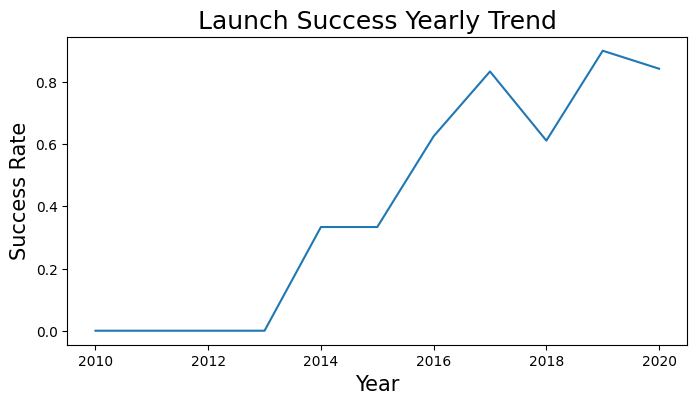

In [60]:
# Plot of a line chart with x axis to be the extracted year and y axis to be the success rate

# Extract years from the date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Group by year and calculate the mean success rate
# Grouping by year and calculating the mean success rate helps us visualize the launch success yearly trend.
# This is typically done during the exploratory data analysis (EDA) phase to:
# 1. Identify trends or patterns in the launch success rate over the years.
# 2. Understand significant changes or improvements in the success rate over time.
# 3. Detect anomalies or outliers in the yearly success rates for further investigation.
yearly_success = df.groupby('Year')['Class'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.lineplot(x='Year', y='Class', data=yearly_success)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Launch Success Yearly Trend", fontsize=18)
plt.show()

We can see since 2013, the success rate kept increasing until 2020.

### **Feature Engineering**

It is clear that there are some variables that are very important when it comes to determining the success of the landing of the rockets.. Below we will select the features that will be used to predict the sucess later when we tackle machine learning

In [61]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             1  6123.547647   LEO  CCSFS SLC 40        1     False   False   
1             2   525.000000   LEO  CCSFS SLC 40        1     False   False   
2             3   677.000000   ISS  CCSFS SLC 40        1     False   False   
3             4   500.000000    PO   VAFB SLC 4E        1     False   False   
4             5  3170.000000   GTO  CCSFS SLC 40        1     False   False   

    Legs LandingPad  Block  ReusedCount Serial  
0  False        NaN    1.0            0  B0003  
1  False        NaN    1.0            0  B0005  
2  False        NaN    1.0            0  B0007  
3  False        NaN    1.0            0  B1003  
4  False        NaN    1.0            0  B1004

#### **Creating dummy variables to categorical columns**

Using the function get_dummies() and 'features' to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial

In [62]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6123.547647        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  \
0            0        False      False      False      False      False   
1            0        False      False      False      False      False   
2            0        False      False      False      False       True   
3            0        False      False      False      False      False   
4            0        False      False       True      False      False   

   Orbit_LEO  Orbit_MEO  Orbit_PO  Orbit_SO  Orbit_SSO  Orbit_VLEO  \
0       True      False     False     False      False       False   
1       True      False     False     False      False       False   
2      False      False     False     False      False       False   
3      False      False      True     False      False       False   
4      False      False     False     False      False       False   

   LaunchSite_CCSFS SLC 40  LaunchSite_KSC LC 39A  LaunchSite_VAFB SLC 4E  \
0                     True                  False                   False   
1                     True                  False                   False   
2                     True                  False                   False   
3                    False                  False                    True   
4                     True                  False                   False   

   LandingPad_5e9e3032383ecb267a34e7c7  LandingPad_5e9e3032383ecb554034e7c9  \
0                                False                                False   
1                                False                                False   
2                                False                                False   
3                                False                                False   
4                                False                                False   

   LandingPad_5e9e3032383ecb6bb234e7ca  LandingPad_5e9e3032383ecb761634e7cb  \
0                                False                                False   
1                                False                                False   
2                                False                                False   
3                                False                                False   
4                                False                                False   

   LandingPad_5e9e3033383ecbb9e534e7cc  Serial_B0003  Serial_B0005  \
0                                False          True         False   
1                                False         False          True   
2                                False         False         False   
3                                False         False         False   
4                                False         False         False   

   Serial_B0007  Serial_B1003  Serial_B1004  Serial_B1005  Serial_B1006  \
0         False         False         False         False         False   
1         False         False         False         False         False   
2          True         False         False         False         False   
3         False          True         False         False         False   
4         False         False          True         False         False   

   Serial_B1007  Serial_B1008  Serial_B1010  Serial_B1011  Serial_B1012  \
0         False         False         False         False         False   
1         False         False         False         False         False   
2         False         False         False         False         False   
3         False         False         False         False         False   
4         False         False   

#### **Casting all numeric columns to float64**
Now that our features_one_hot dataframe only contains numbers cast the entire dataframe to variable type float64

In [63]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

All of our data are now the data type 'float'. This is the end of this section; Exploratory data analysis and we are ready to delve into the predictions.

## **6. Machine Learning Prediction**

#### Classification models used
*   Logistic Regression

*   Support Vector Machine (SVM)

*   K Nearest Neighbours (KNN)

*   Decision Trees
*   Random Forests

**Import Necessary Libraries**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
# libraries for Neural Nets
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid, softmax
from sklearn.metrics import classification_report, confusion_matrix

The following cell is for plotting the confusion matrix for the different models

In [30]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

Below is a summary of how to read a confusion matrix
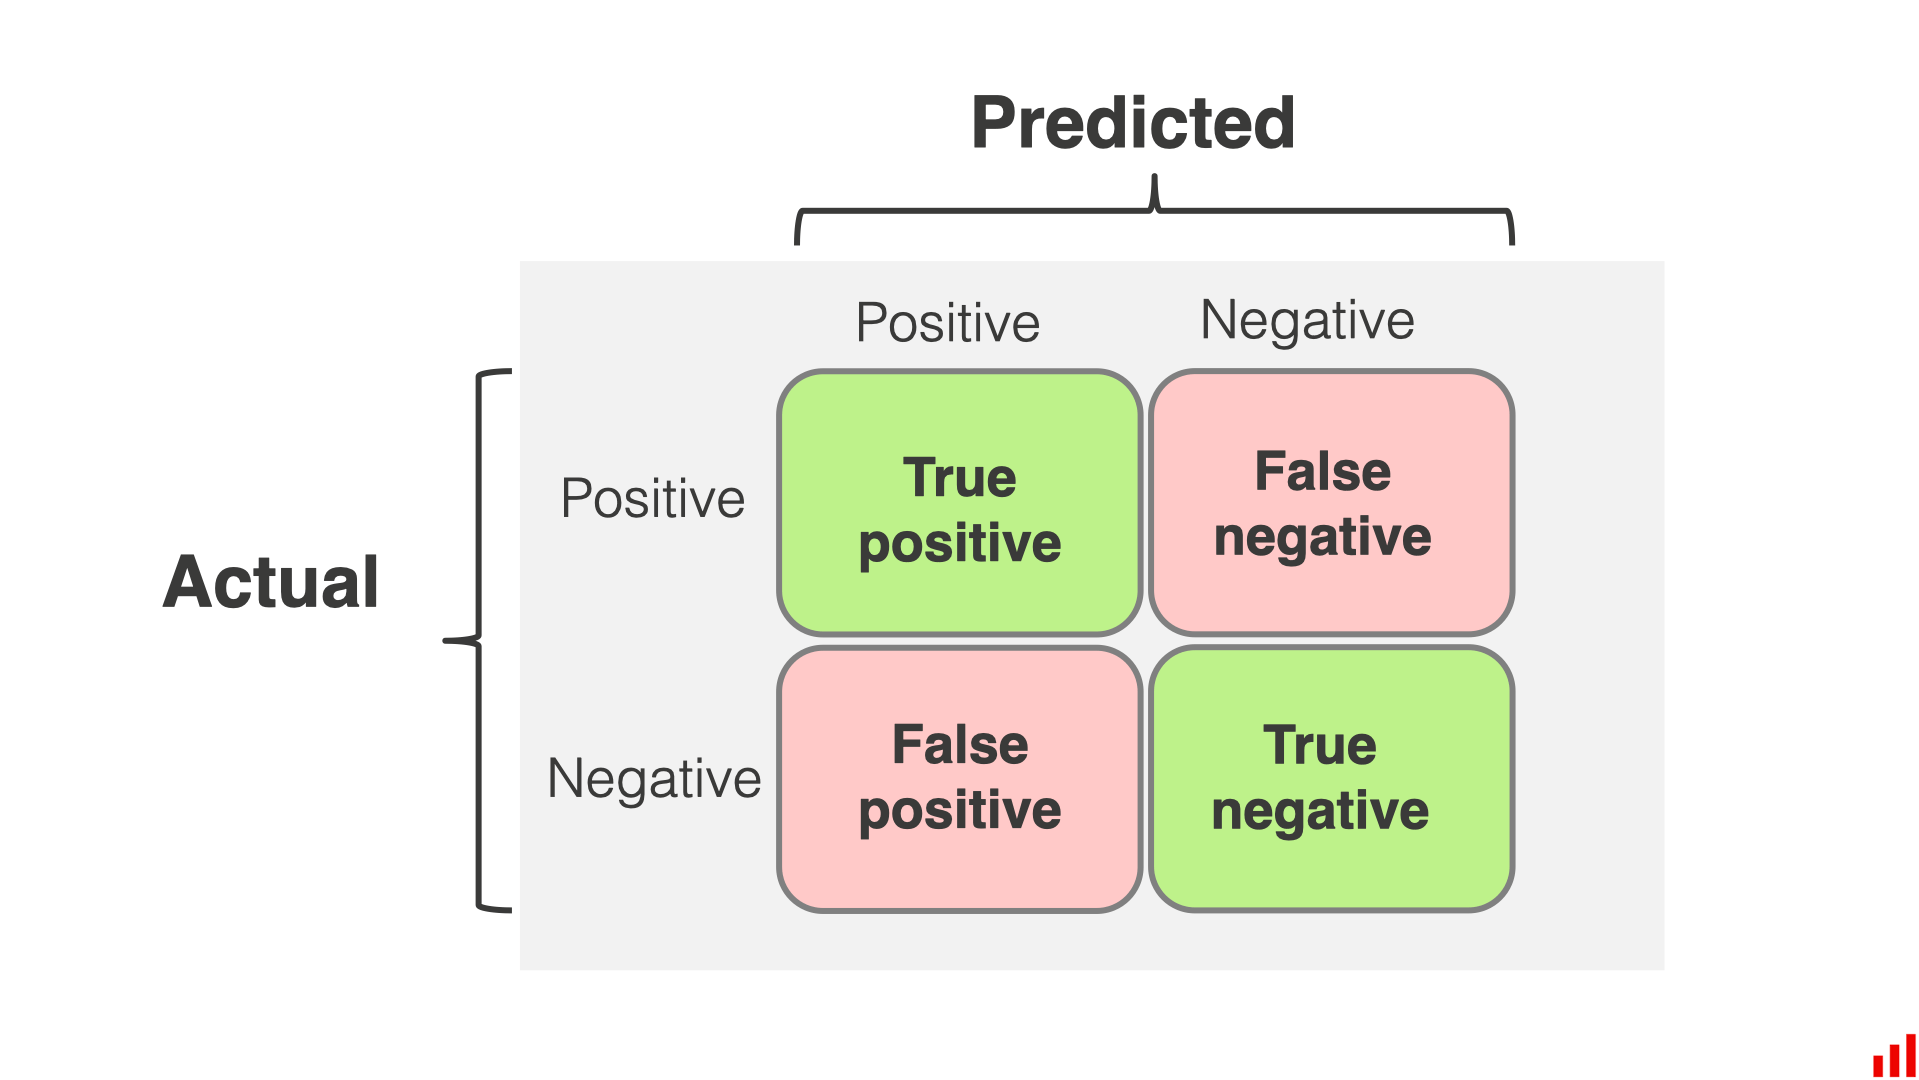

First, we See if the data is in the intended format again
 We will use the datasets provided by IBM, as it is cleaner and has the attributes we need to do the predictions

 They are both the exact same as what we engineered already, but the first one has the 'class' label which is in the dataset that wasn't engineered yet and we need that column
 And the second one is the dataset that has already went through feature engineering.

 Here is the dataset for easy access

 https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv

In [31]:
file_path = '/content/dataset_part_2.csv'
df = pd.read_csv(file_path)
df.head()

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      0  
1            0  B0005  -80.577366  28.561857      0  
2            0  B0007  -80.577366  28.561857      0  
3            0  B1003 -120.610829  34.632093      0  
4            0  B1004  -80.577366  28.561857      0

In [32]:
file_path3 = '/content/dataset_part_3.csv'
X = pd.read_csv(file_path3)
X.head()

FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0        0.0        0.0        0.0        0.0  ...           0.0   
1        0.0        0.0        0.0        0.0  ...           0.0   
2        0.0        0.0        0.0        1.0  ...           0.0   
3        0.0        0.0        0.0        0.0  ...           0.0   
4        0.0        1.0        0.0        0.0  ...           0.0   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0           0.0           0.0           0.0             1.0            0.0   
1           0.0           0.0           0.0             1.0            0.0   
2           0.0           0.0           0.0             1.0            0.0   
3           0.0           0.0           0.0             1.0            0.0   
4           0.0           0.0           0.0             1.0            0.0   

   Reused_False  Reused_True  Legs_False  Legs_True  
0           1.0          0.0         1.0        0.0  
1           1.0          0.0         1.0        0.0  
2           1.0          0.0         1.0        0.0  
3           1.0          0.0         1.0        0.0  
4           1.0          0.0         1.0        0.0  

[5 rows x 83 columns]

First, We Create a NumPy array from the column Class in data and assigning it to Y

In [33]:
Y = df['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Now that we have the target column (y), we work with our feature engineered dataset, (x).

We first standardize the data.

In [34]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

We then split the data into training and testing data using the function train_test_split.

The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function GridSearchCV.



In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
Y_test.shape

(18,)

We can see that we have only 18 test samples.

### **Logistic Regression**

We then Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10.

Fit the object to find the best parameters from the dictionary parameters.

The following is a standard parameters dictionary, it is used together with GridSearchCV and it is responsible for finding the best hyperparameters for a ML model.
Different models might require different parameters.

In [36]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [37]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv = 10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the GridSearchCV object for logistic regression.

We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_

In [38]:
print("Tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.8464285714285713


Next, we calculate the accuracy on the test data.

Then plot the confusion matrix

In [39]:
log_reg_accuracy = logreg_cv.score(X_test, Y_test)
log_reg_accuracy

0.8333333333333334

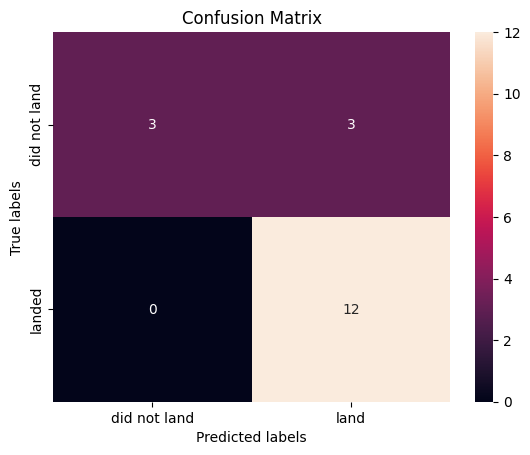

In [40]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.

 We see that the major problem is false positives.

### **Support Vector Machine (SVM)**

In the same way as earlier, we create an SVM object, then create a GridSearchCV object with cv = 10.

Fit the object to find the best parameters from the dictionary parameters.

And just like we did with Logistic Regression, we will fit the model, print the best hyperparameters, their accuracies on the test set and the confusion matrix as well.

As we can see below, the parameters are now different because it is not logistic regression anymore.

In [41]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [42]:
svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [43]:
print("Tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("Accuracy :",svm_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy : 0.8482142857142856


In [44]:
svm_accuracy = svm_cv.score(X_test, Y_test)
svm_accuracy

0.8333333333333334

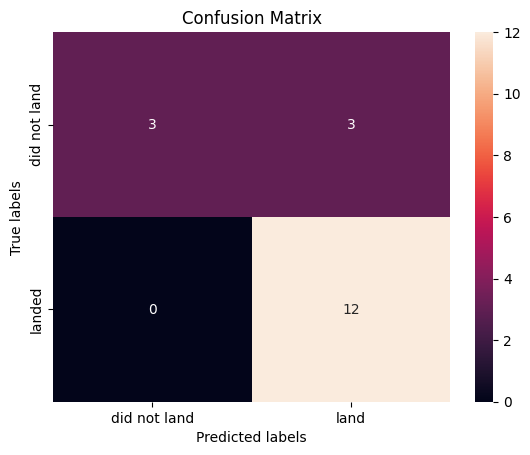

In [45]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

We can see that there isn't much difference from SVM and logistic regression, they both have major errors in terms of the false positive

### **KNN - K Nearest Neighbour**

In [157]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [159]:
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [160]:
print("Tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("Accuracy :",knn_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy : 0.8482142857142858


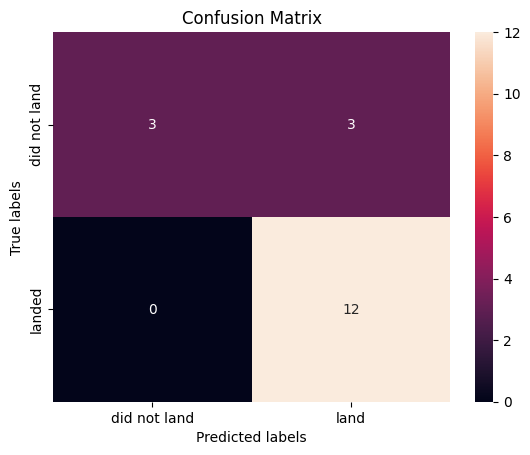

In [161]:
yhat=knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [162]:
knn_accuracy = knn_cv.score(X_test, Y_test)
knn_accuracy

0.8333333333333334

We got **83% Accuracy**

Because of the three almost identical accuracies, we might be underfitting or something else might be happening.

I am going to approach the next few models a little differently to see if I can find out why and if I can get better results.

Next we dive into another ML model called decision trees.

### **Decision Tree**

Before we train the model, let us first visualize the training and the test sets and how they atre reacting to the model we choose.

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
RANDOM_STATE = 55
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

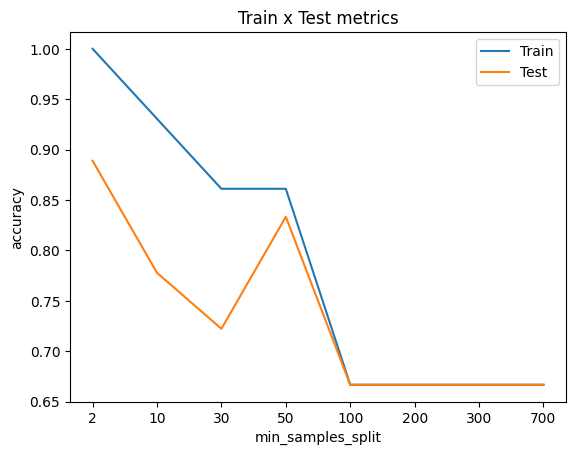

In [49]:
accuracy_list_train = []
accuracy_list_test = []

for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,Y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,Y_train)
    accuracy_test = accuracy_score(predictions_test,Y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

We can see that around 50 samples, the test set and the training set are pretty close and their accuracies are at the highest parts when they are in the closest proximity. Any samples after that, the accuracy drops significantly. Not only does the accuracy drop, the model starts overfitting the more sample it uses.

Therefore, the best samples to use would be 50.

Now we do the same with Max depth

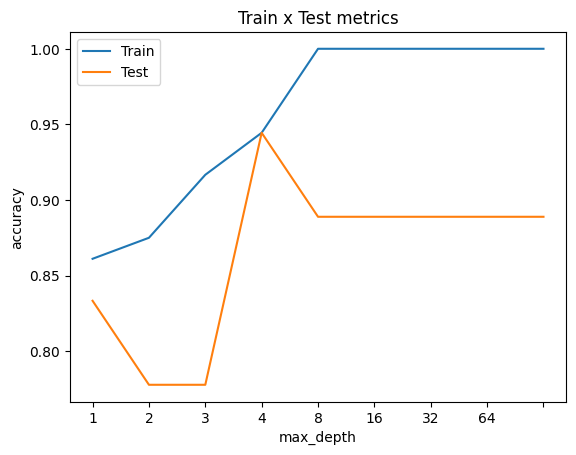

In [50]:
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,Y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,Y_train)
    accuracy_test = accuracy_score(predictions_test,Y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

According to the plot, It looks like the perfect depth is 4.

Anything more or anything less ends up with a significant drop in accuracy not to mention the loss (difference between the training and the testing set) as well

Therefore, we will use

**max depth = 4**

**min samples = 50**

While I was fitting the model below, I added a parameter 'class_weight' because I found out later that the class column in my dataset was imbalanced. I ran into this problem later during tree ensemble so you will see it after this section.

In [54]:
decision_tree_model = DecisionTreeClassifier(class_weight='balanced', min_samples_split = 50,
                                             max_depth = 4,
                                             random_state = RANDOM_STATE).fit(X_train,Y_train)

In [171]:
decision_tree = decision_tree_model.predict(X_test)
decision_tree_score = accuracy_score(decision_tree, Y_test)

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),Y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {decision_tree_score: .4f}")

Metrics train:
	Accuracy score: 0.8472
Metrics validation:
	Accuracy score:  0.8889


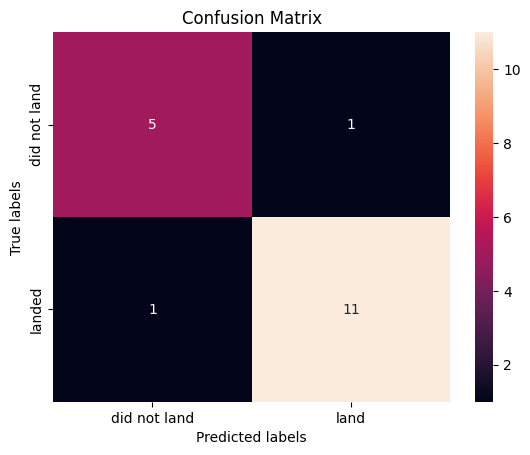

In [164]:
yhat=decision_tree_model.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

We can see that we got a much better score metrics with Decision Trees.

 Let's try with tree ensembles.

### **Random Forest**

One additional hyperparameter for Random Forest is called n_estimators which is the number of Decision Trees that make up the Random Forest.

 for a Random Forest, we randomly choose a subset of the features AND randomly choose a subset of the training examples to train each individual tree.

 We can also speed up the training jobs with another parameter, n_jobs.

 We will run the same script again, but with another parameter, n_estimators, where we will choose between 10, 50, and 100. The default is 100.

In [57]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

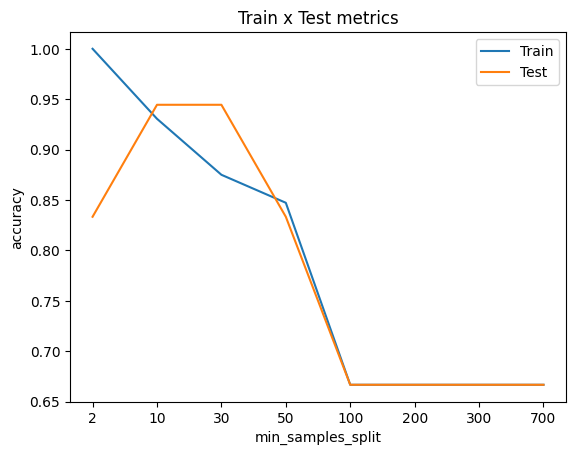

In [58]:
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(class_weight='balanced', min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,Y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,Y_train)
    accuracy_test = accuracy_score(predictions_test,Y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

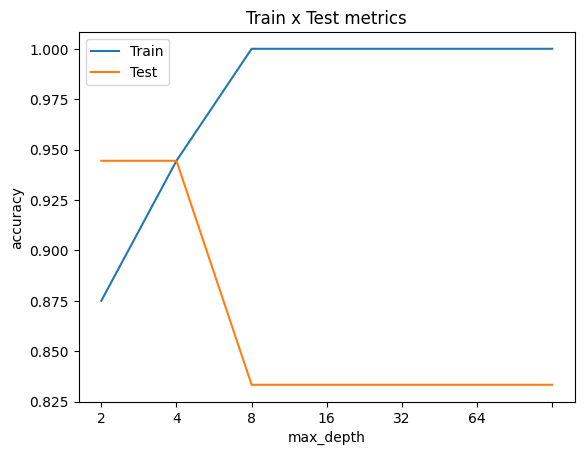

In [59]:
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(class_weight='balanced', max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,Y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,Y_train)
    accuracy_test = accuracy_score(predictions_test,Y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])
plt.show()

It seems to show that max depth doesnt matter. This is a major bug. There could be many reasons this could have happened

First, we might have a class imbalance in our training set that would have the test set not test well at all.

So let's see if that's the case with numpy function unique()

**Note:** *I went back and added the 'class_weight' parameter in the above cells already so the plots you already saw above have the "fix" that I am looking for here*

In [60]:
unique, counts = np.unique(Y_train, return_counts=True)
print(dict(zip(unique, counts)))  # This will show you the distribution of classes


{0: 24, 1: 48}


Looks like our data is imbalanced as Class 1 (Successful Landing) has double the instances class 0 (not successfully landing) has. In binary classification, especially with a small dataset, this imabalance might affect our performance.

This might be the reason our models have been performing poorly.

Random Forest has a feature that will pay more attention to the minority case (Class 0). which we will implement above

This is the parameter (class_weight='balanced') while we are fitting the model.

**Note:** *I went back and added the 'class_weight' parameter in the above cells already so the plots you already saw above have the "fix" that I am looking for here*

Now for the N estimators

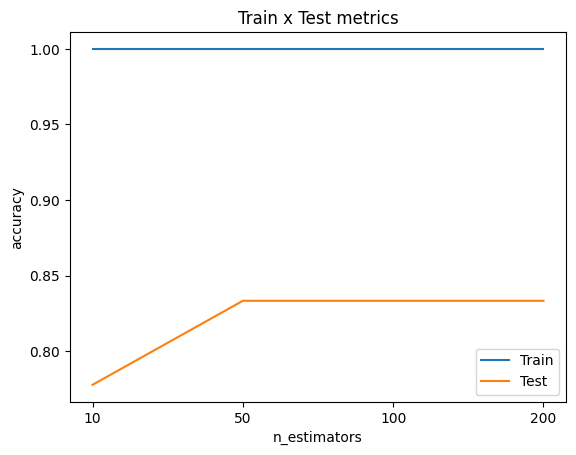

In [120]:
accuracy_list_train = []
accuracy_list_test = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,Y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,Y_train)
    accuracy_test = accuracy_score(predictions_test,Y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

From the plots, we can see that

**min samples = 15**

 *between 10-30 samples, in the plot, the model gives you the same test accuracy but the training accuracy keeps decreasing as you go up in samples therefore we pick 10 for the best minimum samples value. Goes to show you more data doesn't always mean better metrics*

**max depths = 4**

**No. of Trees = 50**

In [125]:
random_forest_model = RandomForestClassifier(class_weight = 'balanced', n_estimators = 50,
                                             max_depth = 4,
                                             min_samples_split = 15).fit(X_train,Y_train)

In [174]:
random_forest = random_forest_model.predict(X_test)
random_forest_score = accuracy_score(random_forest,Y_test)
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),Y_train):.4f}\nMetrics test:\n\tAccuracy score: {random_forest_score:.4f}")

Metrics train:
	Accuracy score: 0.8611
Metrics test:
	Accuracy score: 0.9444




**The metrics have improved significantly.**

**94% accuracy** compared to Logistic regression and svm which had **83% on the test set.**

**Conclusion**

*Random Forrest is a very good model for classification and will almost certainly give you better metrics that when regression and svm are used by themselves*



## **7. Conclusion**

Let us see a comparison of all the models and their accuracies.

In [177]:
accuracies = {
    'Logistic Regression': log_reg_accuracy,
    'SVM': svm_accuracy,
    'Decision Tree': decision_tree_score,
    'KNN': knn_accuracy,
    'Random Forest' : random_forest_score
}
best_model = max(accuracies, key=accuracies.get)
print(f'The best model is {best_model} with an accuracy of {accuracies[best_model]: .4f}')

The best model is Random Forest with an accuracy of  0.9444


#### **Key Findings:**

**The Random Forest model emerged as the best-performing classifier, achieving an accuracy of 94% on the test set**.

Decision Trees and KNN provided reasonable accuracy, but both showed more sensitivity to hyperparameter tuning, revealing the importance of model optimization in achieving better performance.

Logistic Regression and SVM performed consistently around **83% accuracy**, which underlined their effectiveness for the given dataset but left room for improvement compared to Random Forest.

### **References and Credits**


This project was part of the IBM Data Science Professional Certificate program, serving as my capstone project. I would like to thank IBM for providing the foundational knowledge and resources that informed my work.

Additionally, I integrated several custom models and enhancements to improve the analysis and results. These contributions reflect my personal exploration and learning beyond the initial project.

Thank you for reading my project! I hope you learned a little about Data Science.

Zak Mohamed
